In [32]:
import duckdb
import pandas as pd
import folium
from pathlib import Path
from itables import init_notebook_mode


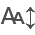

In [33]:
init_notebook_mode(all_interactive=True)

In [1]:
#HEALTH_DB = "../data/healthkit-sqlite-2023-11-17-fix.db"
HEALTH_DB = "../data/healthkit-2024-03-25-fix.db"

In [3]:
assert Path(HEALTH_DB).exists()

In [4]:
con = duckdb.connect(HEALTH_DB)
con.install_extension("sqlite")
con.load_extension("sqlite")

In [5]:
con.sql("PRAGMA show_tables")

┌─────────────────────────────────┐
│              name               │
│             varchar             │
├─────────────────────────────────┤
│ activity_summary                │
│ rActiveEnergyBurned             │
│ rAppleExerciseTime              │
│ rAppleStandHour                 │
│ rAppleStandTime                 │
│ rAppleWalkingSteadiness         │
│ rAudioExposureEvent             │
│ rBasalEnergyBurned              │
│ rBloodPressureDiastolic         │
│ rBloodPressureSystolic          │
│          ·                      │
│          ·                      │
│          ·                      │
│ rSwimmingStrokeCount            │
│ rTimeInDaylight                 │
│ rVO2Max                         │
│ rWalkingAsymmetryPercentage     │
│ rWalkingDoubleSupportPercentage │
│ rWalkingHeartRateAverage        │
│ rWalkingSpeed                   │
│ rWalkingStepLength              │
│ workout_points                  │
│ workouts                        │
├───────────────────────────

In [6]:
camino_sql = "SELECT * from workouts WHERE sourceName != 'AllTrails' AND startDate >= '2023-10-10' AND startDate <= '2023-10-17' AND duration > 100"

In [7]:
camino_bilbao_sql = "SELECT * from workouts WHERE sourceName != 'AllTrails' AND startDate >= '2023-10-16' AND startDate <= '2023-10-17' AND duration < 100"

In [8]:
stats_sql = "select * FROM workouts WHERE sourceName != 'AllTrails' AND startDate >= '2023-10-16' AND startDate <= '2023-10-17' AND duration < 100"

In [9]:
tmp_df = con.sql(stats_sql).to_df()

In [10]:
import pprint

In [11]:
pprint.pprint(tmp_df["workout_statistics"].iloc[0])

('[{"type": "HKQuantityTypeIdentifierDistanceWalkingRunning", "startDate": '
 '"2023-10-16 22:34:56 +1100", "endDate": "2023-10-17 01:11:02 +1100", "sum": '
 '"3.00333", "unit": "km"}, {"type": '
 '"HKQuantityTypeIdentifierBasalEnergyBurned", "startDate": "2023-10-16 '
 '22:34:56 +1100", "endDate": "2023-10-17 01:11:02 +1100", "sum": "434.14", '
 '"unit": "kJ"}, {"type": "HKQuantityTypeIdentifierHeartRate", "startDate": '
 '"2023-10-16 22:34:56 +1100", "endDate": "2023-10-17 01:11:02 +1100", '
 '"average": "95.1671", "minimum": "80", "maximum": "112", "unit": '
 '"count/min"}, {"type": "HKQuantityTypeIdentifierActiveEnergyBurned", '
 '"startDate": "2023-10-16 22:34:56 +1100", "endDate": "2023-10-17 01:11:02 '
 '+1100", "sum": "1042.97", "unit": "kJ"}]')


In [12]:
import json

In [13]:
json.loads(tmp_df["workout_statistics"].iloc[0])[0]

{'type': 'HKQuantityTypeIdentifierDistanceWalkingRunning',
 'startDate': '2023-10-16 22:34:56 +1100',
 'endDate': '2023-10-17 01:11:02 +1100',
 'sum': '3.00333',
 'unit': 'km'}

In [34]:
workouts_df = con.sql(camino_sql).to_df()

In [35]:
bilbao_df = con.sql(camino_bilbao_sql).to_df()

In [36]:
bilbao_df

id           workoutActivityType  \
0  f93e5a0f19bbeed53a6e384565a1c27f2fd81d76  HKWorkoutActivityTypeWalking   

           duration durationUnit                         sourceName  \
0  44.3948577662309          min  Michael and Ai Leen’s Apple Watch   

  sourceVersion               creationDate                  startDate  \
0        10.0.1  2023-10-17 01:11:16 +1100  2023-10-16 22:34:56 +1100   

                     endDate metadata_HKGroupFitness  ...  \
0  2023-10-17 01:11:02 +1100                    None  ...   

  metadata_HEALTHFIT_MAX_ALTITUDE metadata_HEALTHFIT_FIT_MANUFACTURER  \
0                            None                                None   

  metadata_HEALTHFIT_TOTAL_STRIDES metadata_HEALTHFIT_FIT_SERIAL_NUMBER  \
0                             None                                 None   

  metadata_HEALTHFIT_SPORT metadata_HKAverageSpeed  \
0                     None                    None   

  metadata_HEALTHFIT_APP_VERSION metadata_HKExternalUUID  \
0                           None                    None   

  metadata_HKElevationDescended metadata_HKLapLength  
0                          None                 None  

[1 rows x 45 columns]

In [37]:
workouts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   id                                      9 non-null      object
 1   workoutActivityType                     9 non-null      object
 2   duration                                9 non-null      object
 3   durationUnit                            9 non-null      object
 4   sourceName                              9 non-null      object
 5   sourceVersion                           9 non-null      object
 6   creationDate                            9 non-null      object
 7   startDate                               9 non-null      object
 8   endDate                                 9 non-null      object
 9   metadata_HKGroupFitness                 0 non-null      object
 10  metadata_HKWorkoutBrandName             0 non-null      object
 11  metadata_H

In [38]:
workouts_df.columns

Index(['id', 'workoutActivityType', 'duration', 'durationUnit', 'sourceName',
       'sourceVersion', 'creationDate', 'startDate', 'endDate',
       'metadata_HKGroupFitness', 'metadata_HKWorkoutBrandName',
       'metadata_HKTimeZone', 'metadata_HKCoachedWorkout',
       'metadata_HKWasUserEntered', 'workout_events', 'workout_statistics',
       'metadata_HKWeatherTemperature', 'metadata_HKWeatherHumidity', 'device',
       'metadata_HKIndoorWorkout', 'metadata_HKElevationAscended',
       'metadata_HKSwimmingLocationType', 'metadata_HKAverageMETs',
       'metadata_HEALTHFIT_SUB_SPORT', 'metadata_HEALTHFIT_ROUTE',
       'metadata_HEALTHFIT_FILE_TYPE', 'metadata_HKMaximumSpeed',
       'metadata_HEALTHFIT_TOTAL_MOVING_TIME',
       'metadata_HEALTHFIT_TOTAL_DISTANCE',
       'metadata_HEALTHFIT_MAX_RUNNING_CADENCE',
       'metadata_HEALTHFIT_MIN_ALTITUDE',
       'metadata_HEALTHFIT_AVG_RUNNING_CADENCE',
       'metadata_HEALTHFIT_APP_BUILD', 'metadata_HEALTHFIT_FIT_SPORT',
       '

In [19]:
drop_cols = [
    "workoutActivityType",
    "durationUnit",
    "sourceVersion",
    "metadata_HKGroupFitness",
    "metadata_HKWorkoutBrandName",
    "metadata_HKTimeZone",
    "metadata_HKCoachedWorkout",
    "metadata_HKWasUserEntered",
    "workout_events",
    "metadata_HKWeatherTemperature",
    "metadata_HKWeatherHumidity",
    "metadata_HKIndoorWorkout",
    "metadata_HKElevationAscended",
    "metadata_HKSwimmingLocationType",
    "metadata_HKAverageMETs",
    "metadata_HEALTHFIT_SUB_SPORT",
    "metadata_HEALTHFIT_ROUTE",
    "metadata_HEALTHFIT_FILE_TYPE",
    "metadata_HKMaximumSpeed",
    "metadata_HEALTHFIT_TOTAL_MOVING_TIME",
    "metadata_HEALTHFIT_TOTAL_DISTANCE",
    "metadata_HEALTHFIT_MAX_RUNNING_CADENCE",
    "metadata_HEALTHFIT_MIN_ALTITUDE",
    "metadata_HEALTHFIT_AVG_RUNNING_CADENCE",
    "metadata_HEALTHFIT_APP_BUILD",
    "metadata_HEALTHFIT_FIT_SPORT",
    "metadata_HEALTHFIT_FIT_SUB_SPORT",
    "metadata_HEALTHFIT_MAX_ALTITUDE",
    "metadata_HEALTHFIT_FIT_MANUFACTURER",
    "metadata_HEALTHFIT_TOTAL_STRIDES",
    "metadata_HEALTHFIT_FIT_SERIAL_NUMBER",
    "metadata_HEALTHFIT_SPORT",
    "metadata_HKAverageSpeed",
    "metadata_HEALTHFIT_APP_VERSION",
    "metadata_HKExternalUUID",
    "metadata_HKElevationDescended",
    "metadata_HKLapLength",
]

In [39]:
workouts_df.drop(labels=drop_cols, axis=1, inplace=True)

In [40]:
workouts_df

id           duration  \
0  c8d032b0b3d5a37b1cdf903b895326d98544a5cf   111.755210117499   
1  fe0c7b4b53e8bb54f5778cd6d53346369c911a44  295.3440696001053   
2  f93c03d8c8da636a286dec70198ea6926526e0cc  159.4728589514891   
3  94cc27023212a4870bff85a358eb49acbe6e33f6  272.1293779174487   
4  f61270ae695423e242b2492cd92d77b8ab09efb4  331.8347500840823   
5  76df05bf23ddbeac42da1697d18c8cf7f5d298d7  395.3480985005697   
6  5bb7a7c168ceccb91ba597f387573d883a66d6b1  395.1284047663212   
7  7bc4e2f51b291c17f93adfb549302276d0ee2dfc  348.3012007991473   
8  9c4f849e492c0ba84f034bdb9be4a91e70cf5d76  130.5475179314613   

                          sourceName               creationDate  \
0  Michael and Ai Leen’s Apple Watch  2023-10-10 06:28:04 +1100   
1  Michael and Ai Leen’s Apple Watch  2023-10-10 22:27:02 +1100   
2  Michael and Ai Leen’s Apple Watch  2023-10-11 03:06:15 +1100   
3  Michael and Ai Leen’s Apple Watch  2023-10-12 03:38:41 +1100   
4  Michael and Ai Leen’s Apple Watch  2023-10-13 01:00:30 +1100   
5  Michael and Ai Leen’s Apple Watch  2023-10-13 23:41:42 +1100   
6  Michael and Ai Leen’s Apple Watch  2023-10-15 01:28:53 +1100   
7  Michael and Ai Leen’s Apple Watch  2023-10-16 03:41:48 +1100   
8  Michael and Ai Leen’s Apple Watch  2023-10-16 21:49:34 +1100   

                   startDate                    endDate  \
0  2023-10-10 04:36:12 +1100  2023-10-10 06:27:57 +1100   
1  2023-10-10 17:31:21 +1100  2023-10-10 22:26:42 +1100   
2  2023-10-10 23:59:30 +1100  2023-10-11 03:05:53 +1100   
3  2023-10-11 19:24:03 +1100  2023-10-12 03:38:15 +1100   
4  2023-10-12 19:28:15 +1100  2023-10-13 01:00:05 +1100   
5  2023-10-13 17:05:33 +1100  2023-10-13 23:40:54 +1100   
6  2023-10-14 18:51:52 +1100  2023-10-15 01:27:00 +1100   
7  2023-10-15 18:07:01 +1100  2023-10-16 03:37:24 +1100   
8  2023-10-16 19:38:40 +1100  2023-10-16 21:49:13 +1100   

                                  workout_statistics  \
0  [{"type": "HKQuantityTypeIdentifierDistanceWal...   
1  [{"type": "HKQuantityTypeIdentifierDistanceWal...   
2  [{"type": "HKQuantityTypeIdentifierDistanceWal...   
3  [{"type": "HKQuantityTypeIdentifierDistanceWal...   
4  [{"type": "HKQuantityTypeIdentifierDistanceWal...   
5  [{"type": "HKQuantityTypeIdentifierDistanceWal...   
6  [{"type": "HKQuantityTypeIdentifierDistanceWal...   
7  [{"type": "HKQuantityTypeIdentifierDistanceWal...   
8  [{"type": "HKQuantityTypeIdentifierDistanceWal...   

                                              device  
0  <<HKDevice: 0x2822e71b0>, name:Apple Watch, ma...  
1  <<HKDevice: 0x2822e71b0>, name:Apple Watch, ma...  
2  <<HKDevice: 0x2822e71b0>, name:Apple Watch, ma...  
3  <<HKDevice: 0x2822e71b0>, name:Apple Watch, ma...  
4  <<HKDevice: 0x2822e71b0>, name:Apple Watch, ma...  
5  <<HKDevice: 0x2822e71b0>, name:Apple Watch, ma...  
6  <<HKDevice: 0x2822e71b0>, name:Apple Watch, ma...  
7  <<HKDevice: 0x2822e71b0>, name:Apple Watch, ma...  
8  <<HKDevice: 0x2822e71b0>, name:Apple Watch, ma...

In [22]:
walk_id = con.sql(camino_sql.replace("*", "id")).to_df()

In [23]:
walk_ids = walk_id["id"].values.tolist()

In [24]:
walk_ids.pop(0)  # Evening walk in San Sebastin

'c8d032b0b3d5a37b1cdf903b895326d98544a5cf'

In [25]:
bilbao_df["id"].iloc[0]

'f93e5a0f19bbeed53a6e384565a1c27f2fd81d76'

In [26]:
walk_ids.append(bilbao_df["id"].iloc[0])

In [27]:
walk_sql = "SELECT * FROM workout_points WHERE workout_id = 'WORKOUT_ID'"

In [28]:
m = folium.Map(location=[43.3183, -1.9812], zoom_start=12, tiles="openstreetmap")

In [29]:
def update_map(m, df):
    points = df[["latitude", "longitude"]].values.tolist()
    folium.PolyLine(points, color="blue", weight=3.5, opacity=1).add_to(m)
    folium.Marker([df["latitude"].iloc[0], df["longitude"].iloc[0]]).add_to(m)
    return m

In [30]:
for id in walk_ids:
    # TODO: Adjust SQL to only get Camino walks (plus extra in Bilbao) - DONE
    print(f"Getting data for walk ID: {id}")
    walk_df = con.sql(walk_sql.replace("WORKOUT_ID", id)).to_df()
    # TODO: Cache / preprocess the walk data
    m = update_map(m, walk_df)
m.fit_bounds(m.get_bounds())

Getting data for walk ID: fe0c7b4b53e8bb54f5778cd6d53346369c911a44


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Getting data for walk ID: f93c03d8c8da636a286dec70198ea6926526e0cc
Getting data for walk ID: 94cc27023212a4870bff85a358eb49acbe6e33f6
Getting data for walk ID: f61270ae695423e242b2492cd92d77b8ab09efb4
Getting data for walk ID: 76df05bf23ddbeac42da1697d18c8cf7f5d298d7
Getting data for walk ID: 5bb7a7c168ceccb91ba597f387573d883a66d6b1
Getting data for walk ID: 7bc4e2f51b291c17f93adfb549302276d0ee2dfc
Getting data for walk ID: 9c4f849e492c0ba84f034bdb9be4a91e70cf5d76
Getting data for walk ID: f93e5a0f19bbeed53a6e384565a1c27f2fd81d76


In [31]:
m